In [36]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [3]:
os.chdir("C:\\Users\\melis\\Documents\\DSC-540 Machine Learning")
data = pd.read_csv('trafficjam.csv')
data.head()

,Day,Temputure,Wind,TrafficJam,CarDrive
0,1,hot,weak,long,no
1,2,hot,strong,long,no
2,3,hot,weak,long,yes
3,4,mild,weak,long,yes
4,5,cool,weak,short,yes


In [11]:
data['CarDrive'] = LabelEncoder().fit(data['CarDrive']).transform(data['CarDrive'])

In [12]:
data.head()

,Day,Temputure,Wind,TrafficJam,CarDrive
0,1,hot,weak,long,0
1,2,hot,strong,long,0
2,3,hot,weak,long,1
3,4,mild,weak,long,1
4,5,cool,weak,short,1


In [17]:
def calc_entropy(column):
    counts = np.bincount(column)
    probabilites = counts/len(column)
    
    entropy = 0
    
    for prob in probabilites:
        if prob > 0:
            entropy += prob * math.log(prob,2)
    return -entropy

In [18]:
def calc_information_gain(data, split_name, target_name):
    original_entropy = calc_entropy(data[target_name])
    
    values = data[split_name].unique()
    
    left_split=data[data[split_name] == values[0]]
    right_split=data[data[split_name] == values[1]]
    
    to_subtract = 0
    for subset in [left_split, right_split]:
        prob = (subset.shape[0]/data.shape[0])
        to_subtract += prob*calc_entropy(subset[target_name])
        
    return original_entropy - to_subtract

In [20]:
calc_information_gain(data, 'Temputure','CarDrive')

0.26101631550442117

In [21]:
calc_information_gain(data, 'Wind','CarDrive')

0.04812703040826927

In [23]:
calc_information_gain(data, 'TrafficJam','CarDrive')

0.15183550136234136

In [26]:
y = data['CarDrive']
dummy = pd.get_dummies(data, columns=['Temputure','Wind','TrafficJam'])
dummy = dummy.drop(['CarDrive'],axis=1)

x_names = ['Temp = cool', 'Temp = hot','Temp = Mild','Wind = Stong','Wind=weak','Traffic=Long',
          'Traffic=Short']
y_names = ['Dont Drive','Drive']

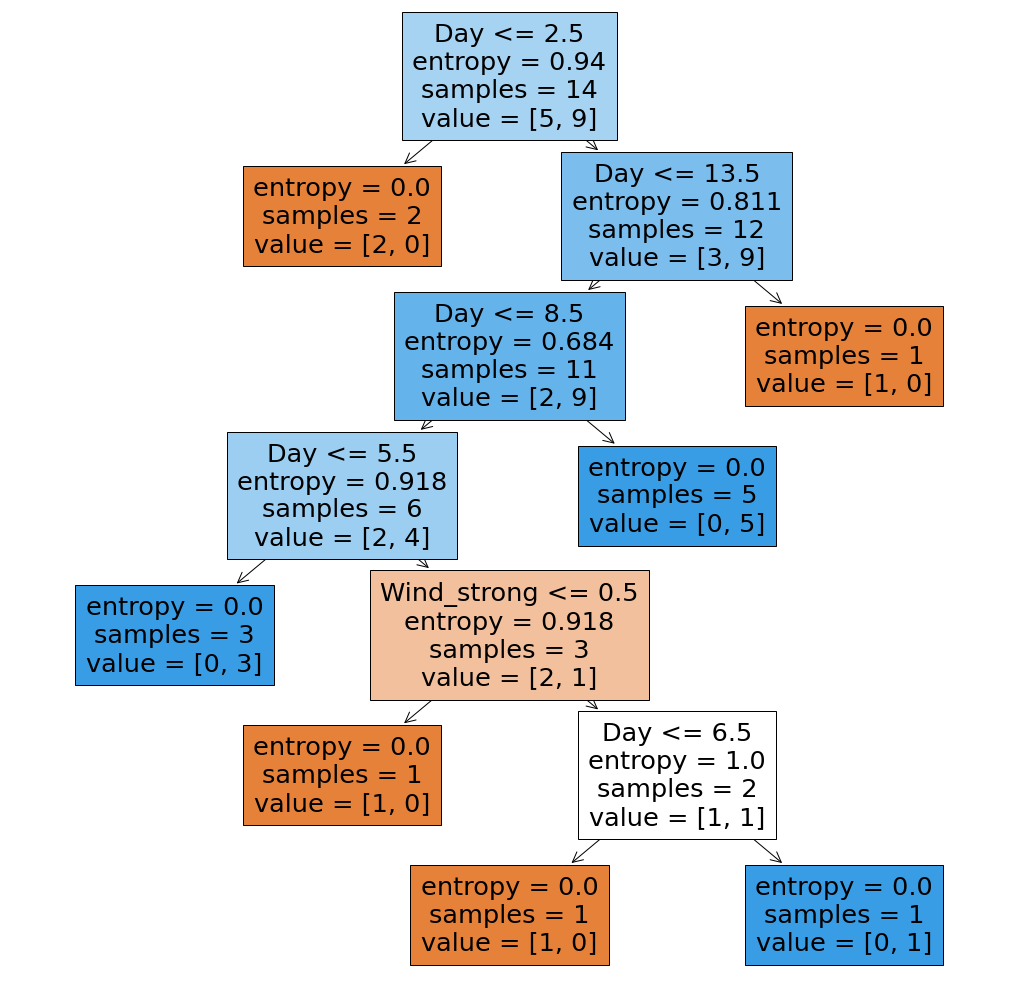

In [39]:
model = DecisionTreeClassifier(criterion="entropy").fit(dummy,y)
model_pred = model.predict(dummy)

plt.figure(figsize=(18,18))
tree.plot_tree(model, filled = True, feature_names=dummy.columns)
plt.show()

In [57]:
os.chdir("C:\\Users\\melis\\Documents\\DSC-540 Machine Learning")
fuzzy = pd.read_csv('trafficjam-fuzzy2.csv')
fuzzy

,hot,mild,cool,weak,strong,short,long,drive
0,1.0,0.0,0.0,1.0,0.0,0.2,0.8,0
1,1.0,0.0,0.0,0.5,0.5,0.2,0.8,0
2,1.0,0.0,0.0,1.0,0.0,0.2,0.8,1
3,0.7,0.3,0.0,1.0,0.0,0.2,0.8,1
4,0.0,0.5,0.5,1.0,0.0,1.0,0.0,1
5,0.0,0.5,0.5,0.5,0.5,1.0,0.0,0
6,0.0,0.5,0.5,0.5,0.5,1.0,0.0,1
7,0.7,0.3,0.0,1.0,0.0,0.2,0.8,0
8,0.0,0.5,0.5,1.0,0.0,1.0,0.0,1
9,0.7,0.3,0.0,1.0,0.0,1.0,0.0,1


In [49]:
sum_min= (.2+.2+.5+.5+1+.5+.5+.2+1+1+.5+.5+1+.2)
sum_Ud= (.5+.5+.5+.5+1+.5+.5+.5+1+1+.5+.5+1+.5)
Beta1 = sum_min/sum_Ud
Beta1

0.8666666666666667

In [52]:
sim_min2=(.5+.5+0+0+0+.5+0+.5+0+0+0+.3+0+.5)
Beta2=sim_min2/sum_Ud
Beta2

0.3111111111111111

In [56]:
Entropy=-(Beta1)*math.log(Beta1,2)-Beta2*math.log(Beta2,2)
Entropy

0.7029901924675248

In [68]:
y = fuzzy[['drive']]
X = fuzzy.values[:, 1:7]
X

array([[0. , 0. , 1. , 0. , 0.2, 0.8],
       [0. , 0. , 0.5, 0.5, 0.2, 0.8],
       [0. , 0. , 1. , 0. , 0.2, 0.8],
       [0.3, 0. , 1. , 0. , 0.2, 0.8],
       [0.5, 0.5, 1. , 0. , 1. , 0. ],
       [0.5, 0.5, 0.5, 0.5, 1. , 0. ],
       [0.5, 0.5, 0.5, 0.5, 1. , 0. ],
       [0.3, 0. , 1. , 0. , 0.2, 0.8],
       [0.5, 0.5, 1. , 0. , 1. , 0. ],
       [0.3, 0. , 1. , 0. , 1. , 0. ],
       [0.3, 0. , 0.5, 0.5, 1. , 0. ],
       [0.3, 0. , 0.5, 0.5, 0.2, 0.8],
       [0. , 0. , 1. , 0. , 1. , 0. ],
       [0.3, 0. , 0.5, 0.5, 0.2, 0.8]])

In [65]:
model2 = DecisionTreeClassifier(criterion="entropy").fit(X,y)

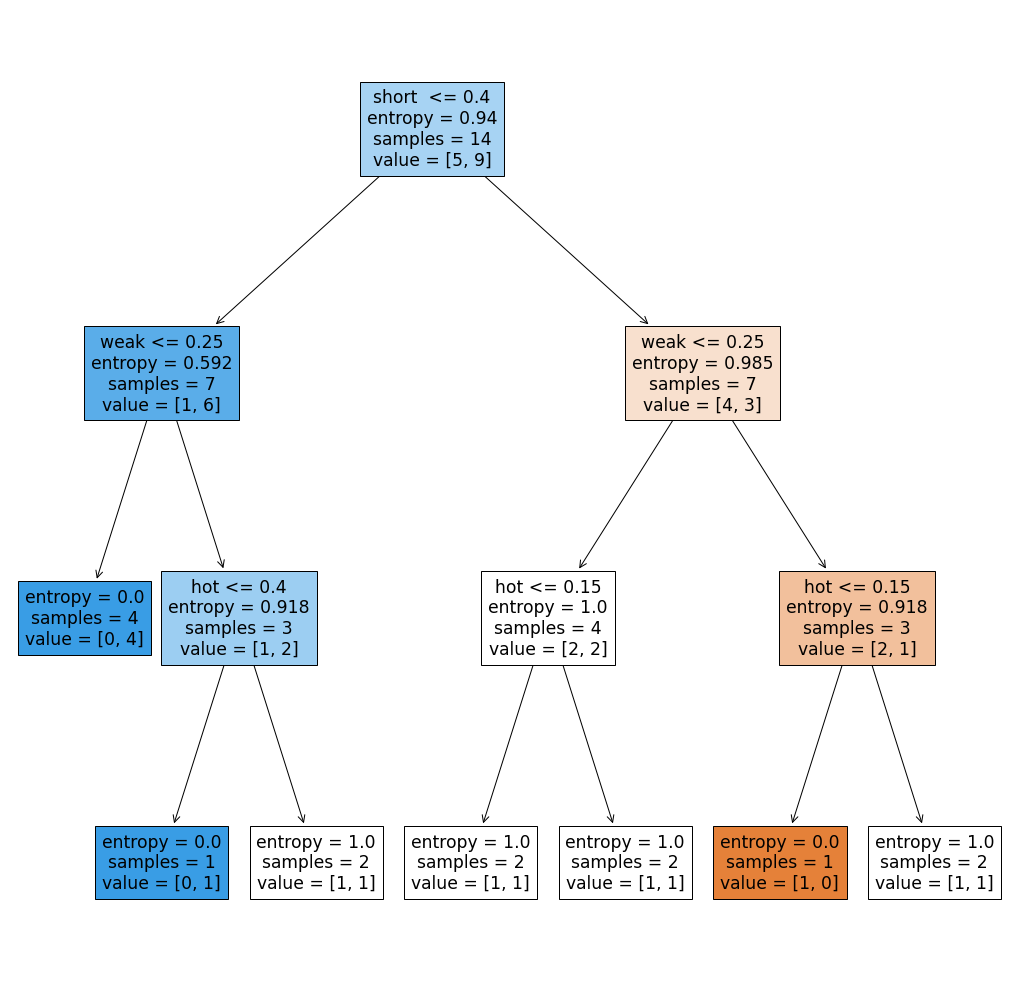

In [69]:
plt.figure(figsize=(18,18))
tree.plot_tree(model2, filled = True, feature_names=fuzzy.columns  )
plt.show()